In [186]:
import pandas as pd
import numpy as np
import dateutil.parser

df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170916.txt')
df = df.head(5000)

df.rename(columns=lambda x: x.strip(), inplace=True)

df['DATE&TIME'] = df['DATE'] + ' ' + df['TIME']
df['DATETIME'] = df['DATE&TIME'].apply(dateutil.parser.parse)
df.drop(['DATE&TIME'], axis=1, inplace=True)

df['DIFF_ENTRIES'] = df.groupby(['C/A','UNIT','SCP','STATION'])['ENTRIES'].diff()
df['DIFF_EXITS'] = df.groupby(['C/A','UNIT','SCP','STATION'])['EXITS'].diff()

df = df[(df['DIFF_ENTRIES'] < 10000) & (df['DIFF_ENTRIES'] > 0)]
df = df[(df['DIFF_EXITS'] < 10000) & (df['DIFF_EXITS'] > 0)]

In [187]:
def plot_distribution(groupby_fields, df, column_string):
    df1 = df.groupby(groupby_fields, as_index=False).sum()
    df1.reset_index(inplace=True)
    df1.rename(columns={'DIFF_ENTRIES':'DAILY_ENTRIES','DIFF_EXITS':'DAILY_EXITS'},inplace=True)

    %matplotlib inline
    import matplotlib.pyplot as plt

    dates = pd.to_datetime(df1[column_string]).tolist()
    daily_entries=df1['DAILY_ENTRIES'].tolist()

    plt.figure(figsize=(10,3))
    plt.plot(dates,daily_entries)

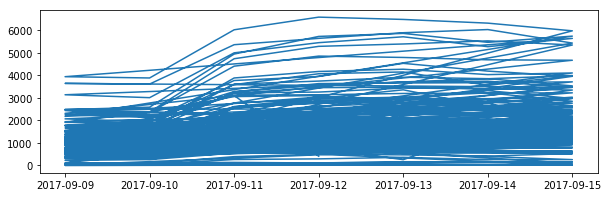

In [188]:
plot_distribution(['C/A','UNIT','SCP','STATION','DATE'], df, 'DATE')

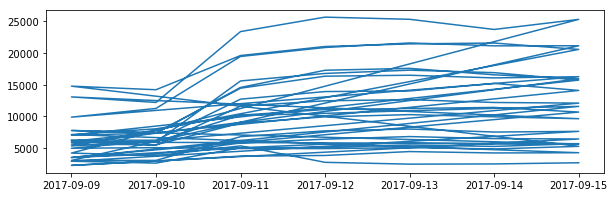

In [189]:
plot_distribution(['C/A','UNIT','STATION','DATE'], df, 'DATE')

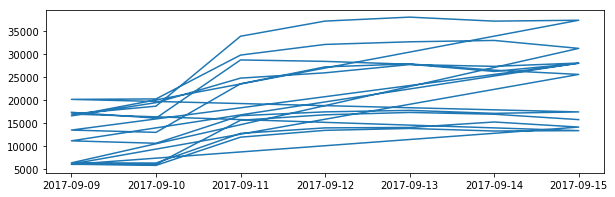

In [190]:
plot_distribution(['STATION','DATE'], df, 'DATE')

In [191]:
df['DAY_WEEK'] = pd.to_datetime(df['DATE']).dt.weekday_name
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DIFF_ENTRIES,DIFF_EXITS,DAY_WEEK
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,2017-09-09 04:00:00,26.0,5.0,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,2017-09-09 08:00:00,17.0,35.0,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669,2017-09-09 12:00:00,80.0,85.0,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,16:00:00,REGULAR,6319212,2138731,2017-09-09 16:00:00,227.0,62.0,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,20:00:00,REGULAR,6319491,2138779,2017-09-09 20:00:00,279.0,48.0,Saturday
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,00:00:00,REGULAR,6319633,2138801,2017-09-10 00:00:00,142.0,22.0,Sunday
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,04:00:00,REGULAR,6319649,2138805,2017-09-10 04:00:00,16.0,4.0,Sunday
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,08:00:00,REGULAR,6319661,2138821,2017-09-10 08:00:00,12.0,16.0,Sunday
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,12:00:00,REGULAR,6319759,2138889,2017-09-10 12:00:00,98.0,68.0,Sunday
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,16:00:00,REGULAR,6319945,2138937,2017-09-10 16:00:00,186.0,48.0,Sunday


In [223]:
df1 = df.groupby(['STATION','DAY_WEEK'], as_index=False).sum()
df1.reset_index(inplace=True)
df1.rename(columns={'DIFF_ENTRIES':'DAILY_ENTRIES','DIFF_EXITS':'DAILY_EXITS'},inplace=True)

%matplotlib inline
import matplotlib.pyplot as plt
df2 = df1.groupby(['STATION'])[['DAILY_ENTRIES']].sum()
df2.sort_values(['DAILY_ENTRIES'], ascending = False, inplace = True)
df2

,DAILY_ENTRIES
STATION,
34 ST-HERALD SQ,219323.0
57 ST-7 AV,199185.0
14 ST-UNION SQ,172518.0
49 ST,169766.0
23 ST,157076.0
5 AV/59 ST,107886.0
TIMES SQ-42 ST,94211.0
59 ST,82521.0
28 ST,77414.0


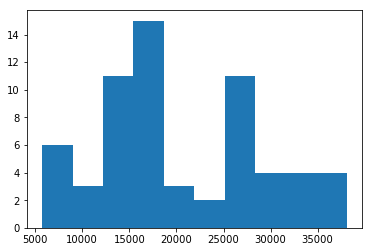

In [227]:
entries_station = df1['DAILY_ENTRIES'].tolist()
plt.hist(entries_station);